# Making Choices

## Questions

- How can my programs do different things based on data values?

## Objectives

- Understand "expressions" and booleans.

- Write conditional statements including `if`, `elif`, and `else` branches.

- Correctly evaluate expressions containing `and` and `or`.

- Understand "boolean indexing" with regard to numpy arrays.

Back in Lesson 2 we began examining radiance experimental & simulation data, but had to leave off our analysis because we didn't know enough. We're now ready to take the next steps. In order to compare the two datasets, we need to take a slice through the middle of our simulation data, turning 3D data into 2D data.

This is easy to do with numpy, but first we need to understand a couple of key concepts.

# Boolean Expressions

`True` and `False` are special words in Python called *booleans*, which represent truth values. A statement such as 

1 < 0 

returns the value `False`, while 

-1 < 0 

returns the value `True` (note that the capitalization is important!).

These are "Boolean Expressions".

In [6]:
print(10 < 5)
print(10 > 5)
print(type(10 > 5))

my_bool = (10 == 10)
my_bool

False
True
<class 'bool'>


True

Bools can be assigned to variables like other types, and they are at the core of "Conditionals". These are statements in coding that follow different routes depending on the state of a given bool.

# Conditionals

We can ask Python to take different actions, depending on the condition, with an `if` statement:

In [7]:
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

not greater
done


The second line of this code uses the keyword `if` to tell Python that we want to make a choice. If the test that follows the `if` statement is true, the body of the `if` (i.e., the set of lines indented underneath it) is executed, and “greater” is printed. If the test is false, the body of the else is executed instead, and “not greater” is printed. Only one or the other is ever executed before continuing on with program execution to print “done”:

![if flowchart](media/python-flowchart-conditional.png)

Conditional statements don’t have to include an `else`. If there is not one, Python simply does nothing if the test is false:



In [8]:
num = 53
print('before conditional...')
if num > 100:
    print(num,' is greater than 100')
print('...after conditional')

before conditional...
...after conditional


We can also chain several tests together using `elif`, which is short for “else if”. The following Python code uses `elif` to print the sign of a number.

In [9]:
num = -3

if num > 0:
    print(num, 'is positive')
elif num == 0:
    print(num, 'is zero')
else:
    print(num, 'is negative')

-3 is negative


Note that to test for equality we use a double equals sign `==` rather than a single equals sign `=` which is used to assign values.

> ## Comparing in Python
> Along with the `>` and `==` operators we have already used for comparing values in our conditionals, there are a few more options to know about:
> 
> - `>`: greater than
> - `<`: less than
> - `==`: equal to
> - `!=`: does not equal
> - `>=`: greater than or equal to
> - `<=`: less than or equal to

We can also combine tests using `and` and `or`. `and` is only true if both parts are true:

In [10]:
if (1 > 0) and (-1 >= 0):
    print('both parts are true')
else:
    print('at least one part is false')

at least one part is false


while `or` is true if at least one part is true:

In [11]:
if (1 < 0) or (1 >= 0):
    print('at least one test is true')

at least one test is true


# Bools and Numpy

As we saw previously, operations on numpy arrays occur "elementwise". If we add a scalar value to an array that value is added to *every* element in the array and if we add two arrays together (provided they have the same shape) each corresponding element is added to the element in the other array.

This is *also* true for boolean expressions.

In [1]:
import numpy as np

# arange is like Python's "range" function, except it returns a numpy array
array = np.arange(10)
print(array)
boolean_array = array <= 5
print(boolean_array)

[0 1 2 3 4 5 6 7 8 9]
[ True  True  True  True  True  True False False False False]


An expression containing a single numpy array and a scalar will evaluate the expression for each element in the array, and similarly an expression between two numpy arrays of identical shapes will evaluate the results of the expression by pairing elements in equivalent locations. This is extremely useful for performing large-scale evaluations and often negates the need to use loops at all. This is known as _vectorization_ and is an extremely useful skill to develop, but beyond the scope of this course. But this is not the only use for boolean arrays.

In fact, in Python we can use boolean arrays to index other arrays, **provided they are the same shape**. If we do this:

```
array[array<=5]
```

Python returns all the elements of `array` where the boolean array `array<=5` evaluates to `True` (i.e. it returns all elements less than, or equal to, 5).

In [13]:
array[boolean_array]

array([0, 1, 2, 3, 4, 5])

We can use this to great effect to extract a cross section from our simulation data.

We need a slice through the data that cuts through the middle of the LED's luminance. This is at approximately `y = 0`. We have three arrays: x coordinates, y coordinates and luminance values. We want all the x coordinates, and luminance values which have a corresponding y value of 0 (or close to).

First let's see what the closest y-value to 0 is. To do this we can use the numpy function `np.amin()` that finds the smallest value in an array and `abs()`, a built in Python function that calculates the absolute value of the argument that is provided.

In [14]:
# load in the data as we did previously
sim = np.loadtxt(fname='simulation01.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]

# Find the closest y-value to 0
smallest_y = np.amin(abs(y))
print(smallest_y)


0.25


We can now use this value to extract all the values of x and the luminance which have this value.

In [15]:
x_cross_section = x[y==smallest_y]
luminance_cross_section = rad[y==smallest_y]

Let's plot our data, as we did previously, to make sure it's worked.

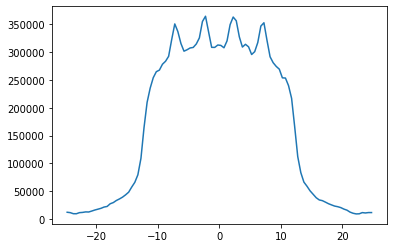

In [16]:
import matplotlib.pyplot as plt

plt.plot(x_cross_section, luminance_cross_section)

Let's finish this lesson by comparing the simulation data to our experimental data.

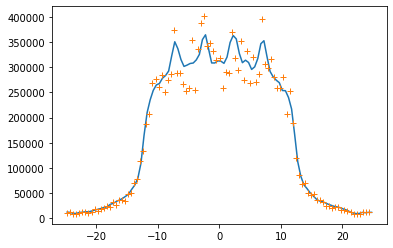

In [17]:
data = np.loadtxt(fname='experiment01.csv', delimiter=',')

# Let's set the marker and linestyle to differentiate between the two
plt.plot(x_cross_section, luminance_cross_section)
plt.plot(data[:,0], data[:, 1], marker='+', linestyle=' ')

The comparison looks good! We'll need to do a bit more analysis before we can be sure, however.

In this way, we have asked Python to select data depending on how it fulfills a particular criterion. 

# Exercise 1* 

Consider this code:

```Python
if 4 > 3:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')
```

Which of the following would be printed if you were to run this code? Why did you pick this answer?

1. A
2. B
3. C
4. B and C

In [18]:
# Enter your solution here

# Exercise 2* - What is Truth?

`True` and `False` booleans are not the only values in Python that are true and false. In fact, any value can be used in an `if` or `elif`. After reading and running the code below, explain what the rule is for which values are considered true and which are considered false.

In [19]:
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

word is true
non-empty list is true
one is true


You can easily check the *Truthiness* or *Falsiness* of an object in Python with another built-in function, `bool()`. Apply it to any object, to inspect if the object is *Truthy* or *Falsy*.

In [20]:
# uncomment these one at a time and try them out!
# bool([])
# bool(1.0)
# bool(0.)
# bool('0.')

# Exercise 3

Sometimes it is useful to check whether some condition is not true. The Boolean operator `not` can do this explicitly. After reading and running the code below, write some if statements that use `not` to test the rule that you formulated in the previous challenge. For bonus points use the `bool()` function  in your answer.


In [21]:
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')

empty string is not true
not not True is true


# Exercise 4* - Casting Boolean Arrays

When we feed an array of `True`s and `False`s into an array to extract the elements at the locations the `True` values correspond to, it is called "*casting*". In the example above we took a 1D slice through the arrays where `y == 0.25`. Below, I have created two arrays `A` and `B`. Both are 5 x 5. `A` contains random numbers. Return the values of `B` where...

- `A` is less than 0
- `A` is greater than 0

What's the significance of the shape of the arrays returned?

In [2]:
import numpy as np
# numpy has a built-in random number generator. Here we use it to create a 5x5 array where elements are randomly
# taken from the standard normal distribution (mean=0, stdev=1)
# we first fix the random number seed so that we get the same results every time!
np.random.seed(1)
A = np.random.randn(5,5)
B = np.arange(25)
# we can reshape numpy arrays using np.reshape
B = np.reshape(B, (5,5))
A, B


(array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
        [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
        [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944],
        [-1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
        [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595]]),
 array([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]]))

# Exercise 5 - Boolean Arrays: `and` and `or`

1. Try creating a boolean array from the luminance data in simulation 1 where `y==0.25 or y==-0.25`

It doesn't work! This is because `and` and `or` do not operate elementwise like other operators we've seen so far. There is an ambiguity. Are we asking if the arrays themselves are Truthy/Falsy or if their elements are individually Truthy/Falsy? This is reflected in the error you get. 

```
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
```

> Note: This error suggests you reduce the boolean arrays to single values (e.g. if you have an array with a mix of True and False then `(y==0.25).any() => True` or if the array is True in all elements then `(y==0.25).all() => True`. See [all](https://docs.python.org/3/library/functions.html#all) and [any](https://docs.python.org/3/library/functions.html#any) for some more information on the matter. Although, in this exercise we need to do things elementwise.

However, there are elementwise functions we can use for use with numpy boolean arrays. These are 

- `np.logical_and(array1, array2)` for `and`
- `np.logical_or(array1, array2)` for `or`

2. Recreate the array from the first part of this question using `np.logical_or`. 

In [2]:
import numpy as np

# load in the data as we did previously
sim = np.loadtxt(fname='simulation01.txt', skiprows=52)
x = sim[:, 0]
y = sim[:, 1]
rad = sim[:, 2]

(y== 0.25).any() or (y == -0.25).all()
# Enter your solution here


True

# Exercise 6* - In-place operators

Python provides in-place operators that work like this:

In [24]:
x = 1  # original value
x += 1 # add one to x, assigning result back to x
x *= 3 # multiply x by 3
print(x)

6


Write some code that sums the positive and negative numbers in a list separately, using in-place operators. You may need to use the `pass` statement (see below). Do you think the result is more or less readable than writing the same without in-place operators? 

> ## The `pass` statement 
> You may wish to use the built-in *statement* `pass`. This tells Python to do nothing and is especially useful when you want nothing to happen but leaving the code blank is a syntax error.
> 
> For example:
> 
> ```Python
> for i in range(10):
>     
> ```
> 
> is a syntax error. BUT, 
> 
> ```Python
> for i in range(10):
>     pass
> ```
> 
> is perfectly valid. You will rarely pass all iterations on a loop, however. Suppose you wanted to check the truthiness of each number and return it if it was `True`. You could use the `pass` statement like so.
> 
> ```Python
> for i in range(10):
>     if bool(i):
>         print(i)
>     else:
>         pass
> ```

In [25]:
positive_sum = 0
negative_sum = 0
test_list = [3, 4, 6, 1, -1, -5, 0, 7, -8]
# Enter your solution here

# Key Points

- Use `if` condition to start a conditional statement, `elif` condition to provide additional tests, and `else` to provide a default.

- The bodies of the branches of conditional statements must be indented.

- Use `==` to test for equality.

- `X and Y` is only true if both `X` and `Y` are `True`.

- `X or Y` is true if either `X` or `Y`, or both, are `True`.

- Zero, the empty string, and the empty list are considered false; all other numbers, strings, and lists are considered true.

- `True` and `False` represent truth values.

This work is derived from work that is Copyright © [Software Carpentry](http://software-carpentry.org/), under the CC-by [license](https://creativecommons.org/licenses/by/4.0/). The text has been paraphrased partially in some locations, with some additional exercises and images included, but the vast majority of the content is derived from the Software Carpentry lesson.